In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [2]:
rate=pd.read_csv("Downloads/rating.csv")

In [3]:
rate.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [4]:
rate.isnull().sum()

article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64

In [5]:
rate.dropna(inplace=True)
rate.drop_duplicates(inplace=True)

In [6]:
rate['url'].value_counts()

url
https://time.com/6320467/amphibians-most-vulnerable-species/                                                                                                               1
https://www.bbc.co.uk/news/world-us-canada-67446799                                                                                                                        1
https://www.bbc.co.uk/news/uk-wales-67455221                                                                                                                               1
https://www.aljazeera.com/sports/2023/11/17/sport-weekly-icc-india-cricket-world-cup-2023-final-australia                                                                  1
https://abcnews.go.com/Technology/wireStory/amazon-lays-off-hundreds-alexa-division-plows-resources-104987681                                                              1
                                                                                                                                   

### Data visualization

In [13]:
from urllib.parse import urlparse


def get_domain(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    if domain.startswith('www.'):
        domain = domain[4:]  
    return domain


rate['domain'] = rate['url'].apply(get_domain)

print(rate['domain'])

2                            time.com
5                       aljazeera.com
6                           bbc.co.uk
11                             rt.com
16                      aljazeera.com
                     ...             
58312    economictimes.indiatimes.com
58338    economictimes.indiatimes.com
58342                       wired.com
58345                   aljazeera.com
58349                       bbc.co.uk
Name: domain, Length: 16800, dtype: object


<Axes: xlabel='domain'>

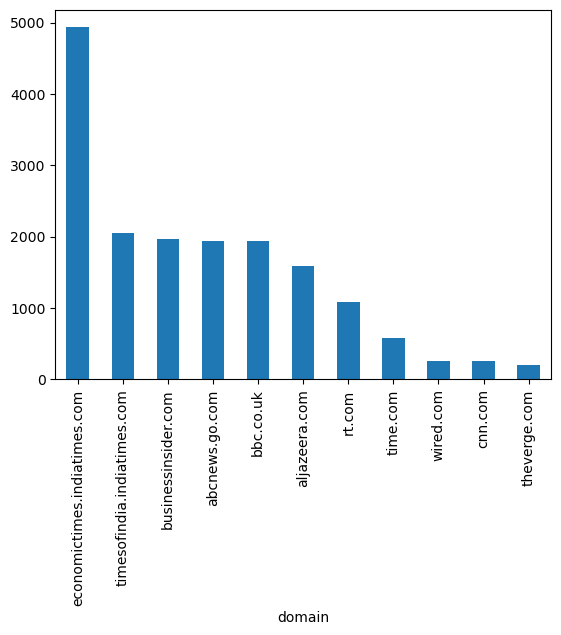

In [17]:
rate['domain'].value_counts().plot(kind='bar')

In [21]:
from datetime import datetime
rate['published_at'] = pd.to_datetime(rate['published_at'], errors='coerce')

# Extract just the date part
rate['date'] = rate['published_at'].dt.date

print(rate['date'])


2        2023-10-04
5        2023-10-27
6        2023-10-12
11       2023-10-26
16       2023-10-04
            ...    
58312           NaT
58338           NaT
58342           NaT
58345           NaT
58349           NaT
Name: date, Length: 16800, dtype: object


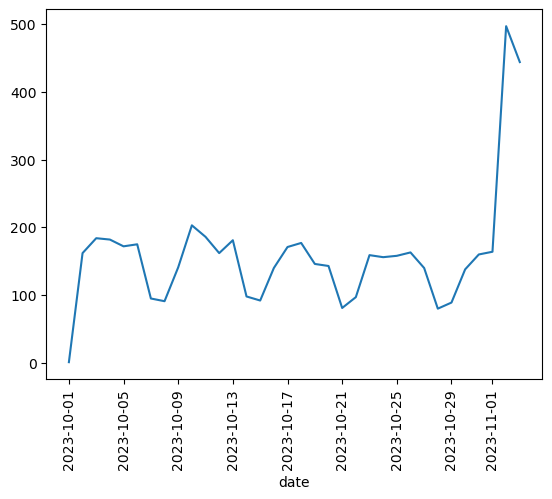

In [29]:
rate['date'].value_counts().plot(kind="line")
plt.xticks(rotation=90) 
plt.show()

In [ ]:
rate.drop(columns=['article_id','source_id'	,'title','description'	,'url'	,'url_to_image','content','article'],inplace True)

In [22]:
rate.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,domain,date
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative,time.com,2023-10-04
5,81707,al-jazeera-english,Al Jazeera English,Al Jazeera,unga calls for humanitarian truce in israel-ha...,The resolution passed with 120 votes in favour...,https://www.aljazeera.com/news/2023/10/27/unga...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-27 22:16:05,The United Nations General Assembly has passed...,Madagascar,the resolution passed with 120 votes in favour...,Neutral,aljazeera.com,2023-10-27
6,81717,bbc-news,BBC News,https://www.facebook.com/bbcnews,malawi heatwave warning issued as temperatures...,"Temperatures could soar to 44C, the weather bu...",https://www.bbc.co.uk/news/world-africa-67086254,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-12 10:40:48,Malawians have been warned of an extreme heatw...,Madagascar,malawians have been warned of an extreme heatw...,Neutral,bbc.co.uk,2023-10-12
11,81739,rt,RT,RT,russian marine scientists to conduct african r...,Russian scientists from VNIRO will conduct res...,https://www.rt.com/africa/585847-russian-scien...,https://mf.b37mrtl.ru/files/2023.10/article/65...,2023-10-26 11:04:42,Scientists from the All-Russian Research Insti...,Madagascar,scientists from the all-russian research insti...,Neutral,rt.com,2023-10-26
16,81755,al-jazeera-english,Al Jazeera English,Al Jazeera,‘kids whose insides are destroyed’: the return...,Mauritius grapples with a drug epidemic of unp...,https://www.aljazeera.com/features/2023/10/4/k...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-04 14:43:28,"Port Louis, Mauritius Until early 2022, Gaetan...",Madagascar,the island nation is grappling with a drug epi...,Negative,aljazeera.com,2023-10-04


In [40]:
rate['title_sentiment'].value_counts()

title_sentiment
Neutral     10187
Negative     4912
Positive     1701
Name: count, dtype: int64

In [41]:
rate['category'].value_counts()

category
India            867
Finance          772
News             646
Health           639
Jobs             492
                ... 
Liechtenstein      1
Palau              1
Belize             1
Tajikistan         1
Vanuatu            1
Name: count, Length: 246, dtype: int64

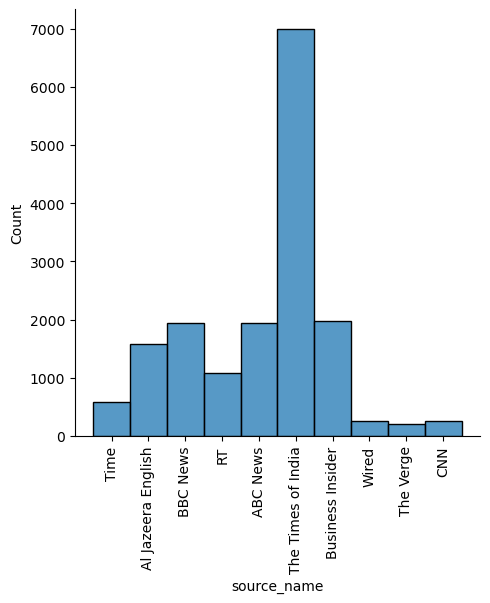

In [42]:
sns.displot(rate['source_name'])
plt.xticks(rotation=90) 
plt.show()

<Axes: xlabel='title_sentiment'>

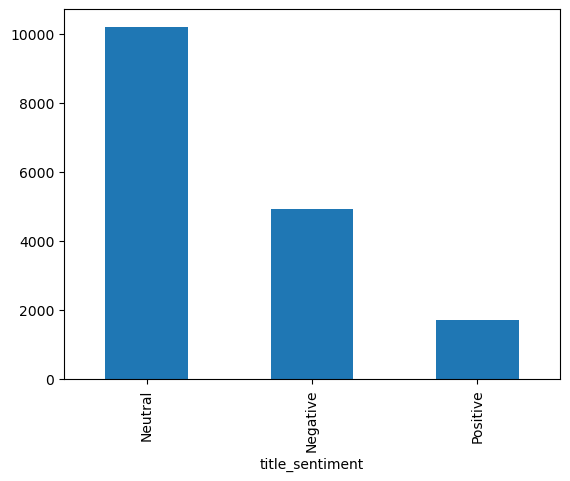

In [43]:
rate['title_sentiment'].value_counts().plot(kind='bar')

In [44]:
rate.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,domain,date,timestamp
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative,time.com,2023-10-04,1696377600000000000
5,81707,al-jazeera-english,Al Jazeera English,Al Jazeera,unga calls for humanitarian truce in israel-ha...,The resolution passed with 120 votes in favour...,https://www.aljazeera.com/news/2023/10/27/unga...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-27 22:16:05,The United Nations General Assembly has passed...,Madagascar,the resolution passed with 120 votes in favour...,Neutral,aljazeera.com,2023-10-27,1698364800000000000
6,81717,bbc-news,BBC News,https://www.facebook.com/bbcnews,malawi heatwave warning issued as temperatures...,"Temperatures could soar to 44C, the weather bu...",https://www.bbc.co.uk/news/world-africa-67086254,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-12 10:40:48,Malawians have been warned of an extreme heatw...,Madagascar,malawians have been warned of an extreme heatw...,Neutral,bbc.co.uk,2023-10-12,1697068800000000000
11,81739,rt,RT,RT,russian marine scientists to conduct african r...,Russian scientists from VNIRO will conduct res...,https://www.rt.com/africa/585847-russian-scien...,https://mf.b37mrtl.ru/files/2023.10/article/65...,2023-10-26 11:04:42,Scientists from the All-Russian Research Insti...,Madagascar,scientists from the all-russian research insti...,Neutral,rt.com,2023-10-26,1698278400000000000
16,81755,al-jazeera-english,Al Jazeera English,Al Jazeera,‘kids whose insides are destroyed’: the return...,Mauritius grapples with a drug epidemic of unp...,https://www.aljazeera.com/features/2023/10/4/k...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-04 14:43:28,"Port Louis, Mauritius Until early 2022, Gaetan...",Madagascar,the island nation is grappling with a drug epi...,Negative,aljazeera.com,2023-10-04,1696377600000000000


In [45]:
rate['Author'] = rate['author'].apply(lambda x: 'BBC' if 'bbc' in x.lower() else x.split()[0])


In [46]:
rate.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,domain,date,timestamp,Author
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative,time.com,2023-10-04,1696377600000000000,Christina
5,81707,al-jazeera-english,Al Jazeera English,Al Jazeera,unga calls for humanitarian truce in israel-ha...,The resolution passed with 120 votes in favour...,https://www.aljazeera.com/news/2023/10/27/unga...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-27 22:16:05,The United Nations General Assembly has passed...,Madagascar,the resolution passed with 120 votes in favour...,Neutral,aljazeera.com,2023-10-27,1698364800000000000,Al
6,81717,bbc-news,BBC News,https://www.facebook.com/bbcnews,malawi heatwave warning issued as temperatures...,"Temperatures could soar to 44C, the weather bu...",https://www.bbc.co.uk/news/world-africa-67086254,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-12 10:40:48,Malawians have been warned of an extreme heatw...,Madagascar,malawians have been warned of an extreme heatw...,Neutral,bbc.co.uk,2023-10-12,1697068800000000000,BBC
11,81739,rt,RT,RT,russian marine scientists to conduct african r...,Russian scientists from VNIRO will conduct res...,https://www.rt.com/africa/585847-russian-scien...,https://mf.b37mrtl.ru/files/2023.10/article/65...,2023-10-26 11:04:42,Scientists from the All-Russian Research Insti...,Madagascar,scientists from the all-russian research insti...,Neutral,rt.com,2023-10-26,1698278400000000000,RT
16,81755,al-jazeera-english,Al Jazeera English,Al Jazeera,‘kids whose insides are destroyed’: the return...,Mauritius grapples with a drug epidemic of unp...,https://www.aljazeera.com/features/2023/10/4/k...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-04 14:43:28,"Port Louis, Mauritius Until early 2022, Gaetan...",Madagascar,the island nation is grappling with a drug epi...,Negative,aljazeera.com,2023-10-04,1696377600000000000,Al


In [47]:
country_count = rate['category'].value_counts()

# Filter the Series for categories with counts less than 100
less_than_100 = country_count[country_count >75]

# Print the categories with counts less than 100
print(less_than_100)

category
India                      867
Finance                    772
News                       646
Health                     639
Jobs                       492
COVID                      427
Education                  407
Ukraine                    344
Travel                     344
Facebook                   343
Stock                      341
Weather                    335
Fashion                    309
Science                    305
Politics                   302
Food                       301
Cars                       296
Australia                  293
Home                       284
Technology                 255
Climate                    246
Israel                     224
Real estate                221
Artificial Intelligence    199
Music                      195
Love                       179
History                    169
Egypt                      166
Palestine, State of        155
world                      145
Mexico                     138
Space                      136

In [48]:
categories_to_replace = ['Breaking News','Politics','News','Finance','Technology','Science',
'Health','Entertainment','Sports','Environment','Crime','Education','Weather']

rate['category'] = rate['category'].apply(lambda x: 'Other' if x in categories_to_replace else x)
